## Web Scraping Python!



### **GitHub trending repos:**

You are tasked to scrape the top 10 trending repositories of Python on GitHub (https://github.com/trending/python?since=daily). Perform the following actions based on the data:

1. Retrieve the name of the repository, the username of the owner, and the URL of the repository.
2. Store the information in a CSV file named "python_trending_repos.csv".
3. Print the information in a tabular format using the PrettyTable library.

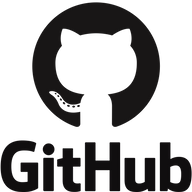

In [ ]:
# Write your code here
! pip install scrapy

In [3]:
from scrapy import Selector
import requests
from prettytable import PrettyTable

html = requests.get("https://github.com/trending/python?since=daily").content
sel = Selector(text = html)
href = sel.css('article.Box-row > h2 > a::attr(href)')[:10].extract()

names = []
repository = []
links = []
for element in href:
  links.append((f'github.com{element}'))
  name_repo = element[1:].split('/')
  names.append(name_repo[0])
  repository.append(name_repo[1])

#  Creating a table using PrettyTable
columns = ['name', 'repository', 'link']

myTable = PrettyTable()

myTable.add_column(columns[0], names)
myTable.add_column(columns[1], repository)
myTable.add_column(columns[2], links)

print(myTable)

+------------------+--------------------------------+-------------------------------------------------+
|       name       |           repository           |                       link                      |
+------------------+--------------------------------+-------------------------------------------------+
| LargeWorldModel  |              LWM               |          github.com/LargeWorldModel/LWM         |
|      google      |             magika             |             github.com/google/magika            |
|     RVC-Boss     |           GPT-SoVITS           |          github.com/RVC-Boss/GPT-SoVITS         |
|  AUTOMATIC1111   |     stable-diffusion-webui     | github.com/AUTOMATIC1111/stable-diffusion-webui |
|    microsoft     |              UFO               |             github.com/microsoft/UFO            |
|      kijai       | ComfyUI-DiffusersStableCascade | github.com/kijai/ComfyUI-DiffusersStableCascade |
| google-deepmind  |           graphcast            |       gith

### **IMDB Movies:**

Your task is to scrape the top 10 movies currently playing in theaters in the United States from the website https://www.imdb.com/chart/top/.

Perform the following actions based on the data:

1. Extract movie titles: Extract the title of each movie and store it in a list.

2. Extract movie release year: Extract the release year of each movie and store it in a separate list.

3. Extract movie ratings: Extract the rating of each movie and store it in a separate list.

4. Export the data: Export the extracted data into a CSV file named "top_movies.csv".

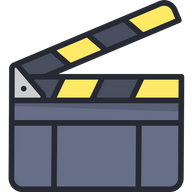

In [24]:
# Write your code here

# importing the necessary libraries
import re
import requests
from bs4 import BeautifulSoup
url = 'https://www.imdb.com/chart/top/'
headers = {'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.124 Safari/537.36',
    'Accept-Language': 'en-US,en;q=0.5',
    'Accept-Encoding': 'gzip, deflate',
    'Referer': 'https://www.google.com',
    'Cookie': 'sessionid=123456789'
}
response = requests.get(url, headers=headers)
soup = BeautifulSoup(response.text, 'lxml')
# soup
movies = soup.find_all('li', class_='ipc-metadata-list-summary-item sc-1364e729-0 caNpAE cli-parent')

movie_names = []
release_years = []
ratings = []
counter = 1
for movie in movies:
  if counter<=10:
    name = movie.find('div', class_='ipc-title ipc-title--base ipc-title--title ipc-title-link-no-icon ipc-title--on-textPrimary sc-be6f1408-9 srahg cli-title').a.text.split('.')[1].strip()
    rating_txt = movie.find('span', class_="ipc-rating-star ipc-rating-star--base ipc-rating-star--imdb ratingGroup--imdb-rating")['aria-label']
    rating = re.search(r'\d+.\d+', rating_txt).group()
    release_year = movie.find('span', class_="sc-be6f1408-8 fcCUPU cli-title-metadata-item").text
    movie_names.append(name)
    release_years.append(release_year)
    ratings.append(rating)
    print(name,release_year,rating)
  else:
    break
  counter+=1

The Shawshank Redemption 1994 9.3
The Godfather 1972 9.2
The Dark Knight 2008 9.0
The Godfather Part II 1974 9.0
12 Angry Men 1957 9.0
Schindler's List 1993 9.0
The Lord of the Rings: The Return of the King 2003 9.0
Pulp Fiction 1994 8.9
The Lord of the Rings: The Fellowship of the Ring 2001 8.9
The Good, the Bad and the Ugly 1966 8.8


In [25]:
#  writing the extracted data into a csv file
import csv
header = ['movie_name', 'release_year', 'rating']
with open('top_movies.csv', 'w', newline="")as f:
  writer = csv.writer(f)
  writer.writerow(header)
  for i in range(len(movie_names)):
    content = [movie_names[i], release_years[i], ratings[i]]
    writer.writerow(content)



## **Activity 3:**



### **Covid-19 Cases:**

You are required to scrape the website https://www.worldometers.info/coronavirus/ to get the latest updates on COVID-19 cases worldwide.

1. Extract the Total Cases, Total Deaths, Total Recovered, and Active Cases data for all countries.

2. Save the data in a CSV file with appropriate column names and make sure to remove any commas or non-numeric characters from the data.

3. Clean the data to remove any missing values or inconsistencies. If there are any missing values, fill them appropriately.

4. Visualize the data using appropriate graphs and charts.

Note: Please make sure to be respectful of the website's terms of use and do not scrape any website that prohibits web scraping.

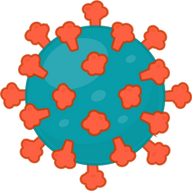

In [ ]:
# Write your code here
import requests
from bs4 import BeautifulSoup
url = "https://www.worldometers.info/coronavirus/"
response = requests.get(url)
soup = BeautifulSoup(response.text,'html.parser')


# Find the table containing the data
table = soup.find("table", {"id": "main_table_countries_today"})

Country = []
Total_cases = []
Total_deaths = []
Total_recoverd =[]
Active_cases = []
for row in table.tbody.find_all('tr'):
    columns = row.find_all('td')

    country = columns[1].text.strip()
    Country.append(country)

    total_cases = columns[2].text.strip().replace(",","")
    Total_cases.append(total_cases)

    total_deaths = columns[4].text.strip().replace(",","")
    Total_deaths.append(total_deaths)

    total_recovered = columns[6].text.strip().replace(",","")
    Total_recoverd.append(total_recovered)

    active_cases = columns[8].text.strip().replace(",","")
    Active_cases.append(active_cases)




print("country", Country)
print("Total_cases", Total_cases)
print("Total_deaths", Total_deaths)
print("Total_recoverd",Total_recoverd)
print("Active_cases", Active_cases)

country ['North America', 'Asia', 'Europe', 'South America', 'Oceania', 'Africa', '', 'World', 'USA', 'India', 'France', 'Germany', 'Brazil', 'Japan', 'S. Korea', 'Italy', 'UK', 'Russia', 'Turkey', 'Spain', 'Australia', 'Vietnam', 'Taiwan', 'Argentina', 'Netherlands', 'Mexico', 'Iran', 'Indonesia', 'Poland', 'Colombia', 'Greece', 'Austria', 'Portugal', 'Ukraine', 'Chile', 'Malaysia', 'Israel', 'Belgium', 'DPRK', 'Thailand', 'Canada', 'Czechia', 'Peru', 'Switzerland', 'Philippines', 'South Africa', 'Romania', 'Denmark', 'Hong Kong', 'Sweden', 'Serbia', 'Singapore', 'Iraq', 'New Zealand', 'Hungary', 'Bangladesh', 'Slovakia', 'Georgia', 'Jordan', 'Ireland', 'Pakistan', 'Norway', 'Finland', 'Kazakhstan', 'Slovenia', 'Lithuania', 'Bulgaria', 'Morocco', 'Croatia', 'Guatemala', 'Lebanon', 'Costa Rica', 'Bolivia', 'Tunisia', 'Cuba', 'UAE', 'Ecuador', 'Panama', 'Uruguay', 'Mongolia', 'Nepal', 'Belarus', 'Latvia', 'Saudi Arabia', 'Azerbaijan', 'Paraguay', 'Bahrain', 'Sri Lanka', 'Kuwait', 'Domin

In [ ]:
import pandas as pd

data_dict = {"Country":Country,"Total cases":Total_cases,"Total deaths":Total_deaths,"Total recoverd":Total_recoverd,"Active cases":Active_cases}
covid = pd.DataFrame(data_dict)
display(covid.head(10))
covid = covid.loc[8:,].set_index(keys='Country')         # removing top 8 rows
covid.head()

,Country,Total cases,Total deaths,Total recoverd,Active cases
0,North America,126901555,1636274,122867258,2398023
1,Asia,217995851,1547356,201653226,14795269
2,Europe,249606071,2064815,245665895,1875361
3,South America,68783950,1356866,66481480,945604
4,Oceania,14496420,28795,14318929,148696
5,Africa,12827167,258791,12086917,481459
6,,721,15,706,0
7,World,690611735,6892912,663074411,20644412
8,USA,107246335,1167381,105380329,698625
9,India,44993579,531897,44459838,1844


,Total cases,Total deaths,Total recoverd,Active cases
Country,,,,
USA,107246335,1167381,105380329,698625
India,44993579,531897,44459838,1844
France,40124889,167548,39913837,43504
Germany,38428685,174352,38240600,13733
Brazil,37639324,703399,36249161,686764


In [ ]:
# clean the data
covid.replace("", 0, inplace=True)  # Replace empty values with 0
covid.replace("N/A", 0, inplace=True)  # Replace "N/A" values with 0
covid = covid.apply(pd.to_numeric, errors="ignore")  # Convert numeric columns to numbers
covid.head()

,Total cases,Total deaths,Total recoverd,Active cases
Country,,,,
USA,107246335,1167381,105380329,698625
India,44993579,531897,44459838,1844
France,40124889,167548,39913837,43504
Germany,38428685,174352,38240600,13733
Brazil,37639324,703399,36249161,686764


In [ ]:
# Save the data to a CSV file
covid.to_csv("covid_data.csv", index=False)

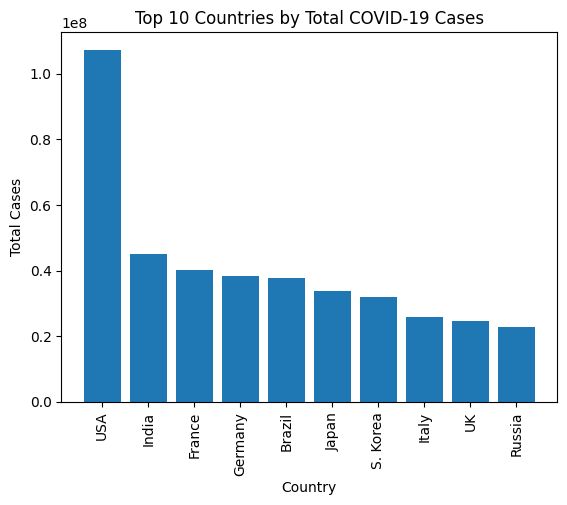

In [ ]:

# Visualize the data
import matplotlib.pyplot as plt

# Sort the data by total cases in descending order
df_sorted = covid.sort_values("Total cases", ascending=False)

# Plot a bar chart for top 10 countries by total cases
top_10 = df_sorted.head(10)
plt.bar(top_10.index, top_10["Total cases"])
plt.xlabel("Country")
plt.ylabel("Total Cases")
plt.title("Top 10 Countries by Total COVID-19 Cases")
plt.xticks(rotation=90)
plt.show()